### Read Raw Seabird CSV file for Quicklook

In [277]:
import ctd
import pandas as pd

# science stack
import numpy as np

# Visual Stack

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline


In [278]:
f = '/Users/bell/ecoraid/2019/CTDcasts/dy1905/rawconverted/ctd022.cnv'

In [279]:
ctd_df = ctd.from_cnv(f)

/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ctd/ctd.py:147: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.header = header
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ctd/ctd.py:149: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.config = config


In [280]:
ctd_df.describe()

,c0mS/cm,c1mS/cm,flECO-AFL,sbeox0V,t090C,t190C,timeS,sbeox1V,par,turbWETntu0,...,sal11,sigma-t00,sigma-t11,sbeox0ML/L,sbox0Mm/Kg,sbeox0PS,sbeox1ML/L,sbox1Mm/Kg,sbeox1PS,nbin
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,32.090385,32.092113,0.615226,2.314462,6.397739,6.398349,269.276595,2.292878,0.222263,0.447627,...,32.010804,25.141127,25.142108,6.607615,287.882736,94.655191,6.279107,273.569809,89.951495,40.181818
std,0.396803,0.396565,0.855507,0.356676,0.286140,0.286310,127.366459,0.356065,0.058942,0.140988,...,0.558755,0.467272,0.467280,1.299182,56.698381,18.710198,1.237605,54.010398,17.824136,8.861369
min,31.411599,31.413091,0.042600,1.266600,5.943100,5.940500,48.553000,1.247100,0.213890,0.259000,...,31.118600,24.291900,24.292800,2.787900,121.336000,39.820000,2.644000,115.071000,37.763000,8.000000
25%,31.717413,31.718666,0.076900,2.211075,6.269950,6.271400,161.894250,2.189575,0.214180,0.336925,...,31.567350,24.804800,24.805350,6.285050,273.723000,90.087000,5.973250,260.143250,85.619250,34.000000
50%,32.065920,32.067211,0.180650,2.425050,6.316650,6.317250,268.454000,2.403250,0.214220,0.401200,...,32.001550,25.134700,25.136450,7.024700,306.031000,100.580000,6.675550,290.820000,95.581000,40.000000
75%,32.393919,32.395148,0.600125,2.493625,6.431325,6.436025,378.073250,2.470250,0.214280,0.551850,...,32.387275,25.447850,25.448450,7.302825,318.251250,104.100750,6.933900,302.172500,98.786000,46.000000
max,32.816461,32.817963,3.050600,2.827800,7.524900,7.525900,493.586000,2.802800,0.823280,0.955700,...,33.202400,26.135900,26.139600,8.250100,359.710000,120.568000,7.853500,342.419000,114.710000,71.000000


In [281]:
ctd_df.to_csv(f.split('/')[-1].replace('.cnv','.csv'))

### Define a Class object for all plots

In [282]:
class CTDProfilePlot(object):


    def __init__(self, fontsize=10, labelsize=10, plotstyle='k-.', stylesheet='seaborn-ticks'):
        """Initialize the timeseries with items that do not change.

        This sets up the axes and station locations. The `fontsize` and `spacing`
        are also specified here to ensure that they are consistent between individual
        station elements.

        Parameters
        ----------
        fontsize : int
            The fontsize to use for drawing text
        labelsize : int
          The fontsize to use for labels
        stylesheet : str
          Choose a mpl stylesheet [u'seaborn-darkgrid', 
          u'seaborn-notebook', u'classic', u'seaborn-ticks', 
          u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', 
          u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', 
          u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', 
          u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', 
          u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', 
          u'seaborn-dark-palette']
        """

        self.fontsize = fontsize
        self.labelsize = labelsize
        self.plotstyle = plotstyle
        self.max_xticks = 10
        plt.style.use(stylesheet)
        mpl.rcParams['svg.fonttype'] = 'none'
        mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
        mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
        mpl.rcParams['axes.grid'] = True
        mpl.rcParams['axes.edgecolor'] = 'white'
        mpl.rcParams['axes.linewidth'] = 0.25
        mpl.rcParams['grid.linestyle'] = '--'
        mpl.rcParams['grid.linestyle'] = '--'
        mpl.rcParams['xtick.major.size'] = 2
        mpl.rcParams['xtick.minor.size'] = 1
        mpl.rcParams['xtick.major.width'] = 0.25
        mpl.rcParams['xtick.minor.width'] = 0.25
        mpl.rcParams['ytick.major.size'] = 2
        mpl.rcParams['ytick.minor.size'] = 1
        mpl.rcParams['xtick.major.width'] = 0.25
        mpl.rcParams['xtick.minor.width'] = 0.25
        mpl.rcParams['ytick.direction'] = 'out'
        mpl.rcParams['xtick.direction'] = 'out'
        mpl.rcParams['ytick.color'] = 'grey'
        mpl.rcParams['xtick.color'] = 'grey'
        
    def plot2var(self, epic_key=None, xdata=None, ydata=None, xlabel=None, secondary=False, **kwargs):
      fig = plt.figure(1)
      ax1 = fig.add_subplot(111)
      p1 = ax1.plot(xdata[0], ydata)
      plt.setp(p1, color=self.var2format(epic_key[0])['color'],
                   linestyle=self.var2format(epic_key[0])['linestyle'],
                   linewidth=self.var2format(epic_key[0])['linewidth'])
      if secondary and not (xdata[1].size == 0):
        p1 = ax1.plot(xdata[1],ydata)
        plt.setp(p1, color=self.var2format(epic_key[1])['color'],
                     linestyle=self.var2format(epic_key[1])['linestyle'],
                     linewidth=self.var2format(epic_key[1])['linewidth'])
        #set plot limits for two vars by finding the absolute range and adding 10%
        abmin=np.min([np.nanmin(xdata[0]),np.nanmin(xdata[1])])
        abmax=np.max([np.nanmax(xdata[0]),np.nanmax(xdata[1])])
        ax1.set_xlim([abmin - 0.1*(abmax-abmin),abmax + 0.1*(abmax-abmin)])

      ax1.invert_yaxis()
      plt.ylabel('Depth (dB)', fontsize=self.labelsize, fontweight='bold')
      plt.xlabel(xlabel[0], fontsize=self.labelsize, fontweight='bold')
    
      fmt=mpl.ticker.StrMethodFormatter(self.var2format(epic_key[0])['format'])
      ax1.xaxis.set_major_formatter(fmt)
      ax1.tick_params(axis='both', which='major', labelsize=self.labelsize)

      #plot second param
      ax2 = ax1.twiny()
      p1 = ax2.plot(xdata[2], ydata)
      plt.setp(p1, color=self.var2format(epic_key[2])['color'],
                   linestyle=self.var2format(epic_key[2])['linestyle'],
                   linewidth=self.var2format(epic_key[2])['linewidth'])
      if secondary and not (xdata[3].size == 0):
        p1 = ax2.plot(xdata[3],ydata)
        plt.setp(p1, color=self.var2format(epic_key[3])['color'],
                     linestyle=self.var2format(epic_key[3])['linestyle'],
                     linewidth=self.var2format(epic_key[3])['linewidth'])
        #set plot limits for two vars by finding the absolute range and adding 10%
        abmin=np.min([np.nanmin(xdata[2]),np.nanmin(xdata[3])])
        abmax=np.max([np.nanmax(xdata[2]),np.nanmax(xdata[3])])
        try:
          ax2.set_xlim([abmin - 0.1*(abmax-abmin),abmax + 0.1*(abmax-abmin)])
        except:
          ax2.set_xlim([0,1])

      plt.ylabel('Depth (dB)', fontsize=self.labelsize, fontweight='bold')
      plt.xlabel(xlabel[1], fontsize=self.labelsize, fontweight='bold')

      #set xticks and labels to be at the same spot for all three vars
      ax1.set_xticks(np.linspace(ax1.get_xbound()[0], ax1.get_xbound()[1], self.max_xticks))
      ax2.set_xticks(np.linspace(ax2.get_xbound()[0], ax2.get_xbound()[1], self.max_xticks))

      fmt=mpl.ticker.StrMethodFormatter(self.var2format(epic_key[2])['format'])
      ax2.xaxis.set_major_formatter(fmt)
      ax2.tick_params(axis='x', which='major', labelsize=self.labelsize)


      return plt, fig

    @staticmethod
    def var2format(epic_key):
      """list of plot specifics based on variable name"""
      plotdic={}
      if epic_key in ['T_28']:
        plotdic['color']='red'
        plotdic['linestyle']='-'
        plotdic['linewidth']=0.5
        plotdic['format']='{x:.3f}'
      elif epic_key in ['T2_35']:
        plotdic['color']='magenta'
        plotdic['linestyle']='--'
        plotdic['linewidth']=0.5
        plotdic['format']='{x:.3f}'
      elif epic_key in ['S_41', 'OST_62', 'O_65']:
        plotdic['color']='blue'
        plotdic['linestyle']='-'
        plotdic['linewidth']=0.5
        if epic_key in ['S_41']:
          plotdic['format']='{x:.3f}'
        else:
          plotdic['format']='{x:3.1f}'
      elif epic_key in ['S_42', 'CTDOST_4220', 'CTDOXY_4221']:
        plotdic['color']='cyan'
        plotdic['linestyle']='--'
        plotdic['linewidth']=0.5
        plotdic['format']='{x:3.1f}'
        if epic_key in ['S_42']:
          plotdic['format']='{x:.3f}'
        else:
          plotdic['format']='{x:3.1f}'
      elif epic_key in ['ST_70','Trb_980','SigmaT']:
        plotdic['color']='black'
        plotdic['linestyle']='-'
        plotdic['linewidth']=0.5
        plotdic['format']='{x:.3f}'
      elif epic_key in ['F_903','fWS_973','Fch_906']:
        plotdic['color']='green'
        plotdic['linestyle']='-'
        plotdic['linewidth']=0.5
        plotdic['format']='{x:.2f}'
      elif epic_key in ['PAR_905']:
        plotdic['color']='darkorange'
        plotdic['linestyle']='-'
        plotdic['linewidth']=0.75
        plotdic['format']='{x:5.0f}'
      else:
        plotdic['color']='black'
        plotdic['linestyle']='--'
        plotdic['linewidth']=1.0      
        plotdic['format']='{x:.3f}'

      return plotdic

    @staticmethod
    #python3 change as dictionaries no longer have itervalues methods
    def make_patch_spines_invisible(ax):
        ax.set_frame_on(True)
        ax.patch.set_visible(False)
        for sp in ax.spines.values():
            sp.set_visible(False)

### Create and Save Plots

Inputs are the respective columns in the data fram and identifiers for coloring.

In [283]:
ctd_data = CTDProfilePlot()

In [284]:
ctd_df.keys()

Index(['c0mS/cm', 'c1mS/cm', 'flECO-AFL', 'sbeox0V', 't090C', 't190C', 'timeS',
       'sbeox1V', 'par', 'turbWETntu0', 'sal00', 'sal11', 'sigma-t00',
       'sigma-t11', 'sbeox0ML/L', 'sbox0Mm/Kg', 'sbeox0PS', 'sbeox1ML/L',
       'sbox1Mm/Kg', 'sbeox1PS', 'nbin', 'flag'],
      dtype='object')

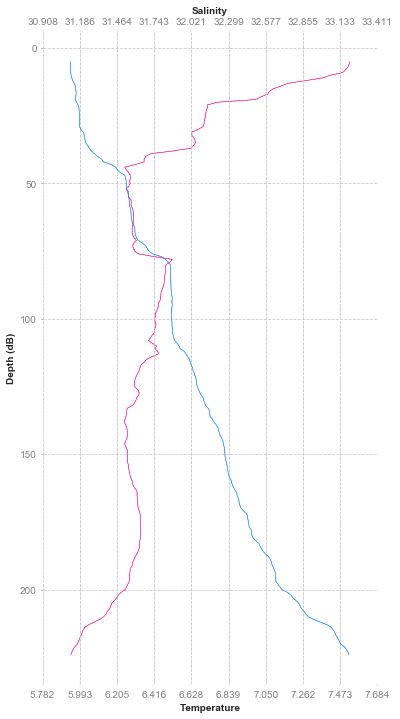

In [285]:
plt,fig =ctd_data.plot2var(epic_key=['T_28','T2_35','S_41','S_42'],
                  xdata=[ctd_df.t090C,ctd_df.t190C,ctd_df.sal00,ctd_df.sal11],
              ydata=ctd_df.index,
                  secondary=True,
                  xlabel=['Temperature','Salinity'])

DefaultSize = fig.get_size_inches()
fig.set_size_inches( (DefaultSize[0], DefaultSize[1]*3) )
plt.savefig(f.split('/')[-1].replace('.cnv','_TempSal.png'))

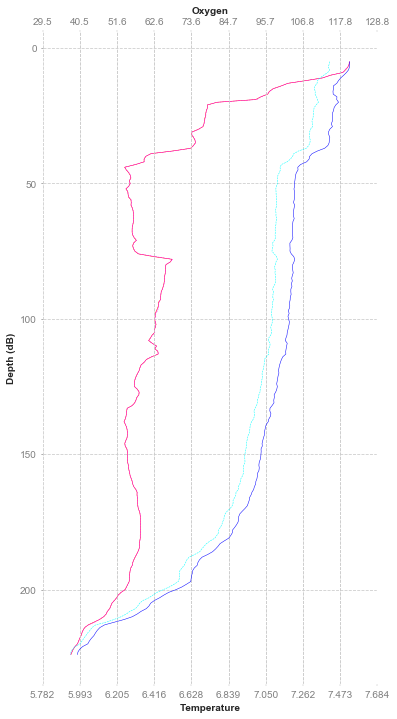

In [286]:
plt,fig =ctd_data.plot2var(epic_key=['T_28','T2_35','OST_62','CTDOST_4220'],
                  xdata=[ctd_df.t090C,ctd_df.t190C,ctd_df.sbeox0PS,ctd_df.sbeox1PS],
              ydata=ctd_df.index,
                  secondary=True,
                  xlabel=['Temperature','Oxygen'])

DefaultSize = fig.get_size_inches()
fig.set_size_inches( (DefaultSize[0], DefaultSize[1]*3) )
plt.savefig(f.split('/')[-1].replace('.cnv','_TempOxy.png'))

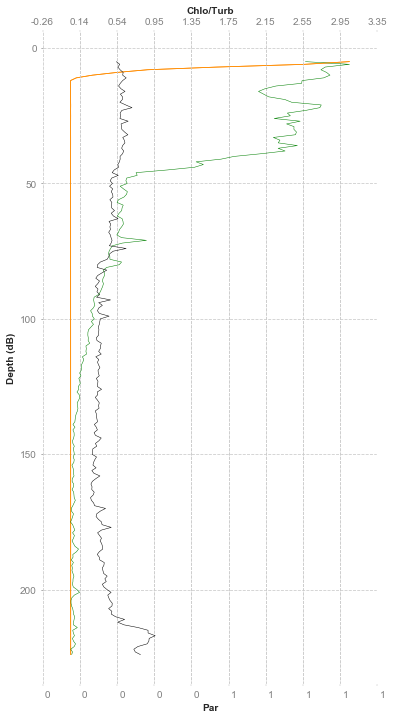

In [287]:
plt,fig =ctd_data.plot2var(epic_key=['PAR_905','PAR_905','Fch_906','Trb_980'],
                  xdata=[ctd_df.par,ctd_df.par,ctd_df['flECO-AFL'],ctd_df.turbWETntu0],
              ydata=ctd_df.index,
                  secondary=True,
                  xlabel=['Par','Chlo/Turb'])

DefaultSize = fig.get_size_inches()
fig.set_size_inches( (DefaultSize[0], DefaultSize[1]*3) )
plt.savefig(f.split('/')[-1].replace('.cnv','_ParChlorTurb.png'))

In [288]:
import seawater as sw

def plot_salvtemp(salt, temp, press, srange=[28,34], trange=[-2,15], ptitle=""): 
    plt.style.use('ggplot')
    
    # Figure out boudaries (mins and maxs)
    smin = srange[0]
    smax = srange[1]
    tmin = trange[0]
    tmax = trange[1]

    # Calculate how many gridcells we need in the x and y dimensions
    xdim = int(round((smax-smin)/0.1+1,0))
    ydim = int(round((tmax-tmin)+1,0))
    
    #print 'ydim: ' + str(ydim) + ' xdim: ' + str(xdim) + ' \n'
    if (xdim > 10000) or (ydim > 10000): 
        print('To many dimensions for grid in {cruise} {cast} file. Likely  missing data \n'.format(cruise=cruise,cast=cast))
        return
 
    # Create empty grid of zeros
    dens = np.zeros((ydim,xdim))
 
    # Create temp and salt vectors of appropiate dimensions
    ti = np.linspace(0,ydim-1,ydim)+tmin
    si = np.linspace(0,xdim-1,xdim)*0.1+smin
 
    # Loop to fill in grid with densities
    for j in range(0,int(ydim)):
        for i in range(0, int(xdim)):
            dens[j,i]=sw.dens0(si[i],ti[j])
 
    # Substract 1000 to convert to sigma-t
    dens = dens - 1000
 
    # Plot data ***********************************************
    fig, ax1 = plt.subplots(figsize=(8, 8), facecolor='w', edgecolor='w')
    CS = plt.contour(si,ti,dens, linestyles='dashed', colors='gray')
    plt.clabel(CS, fontsize=12, inline=1, fmt='%1.1f') # Label every second level
 
    ts = ax1.scatter(salt,temp, c=press, cmap='gray', s=10)
    cbar = plt.colorbar(ts)
    cbar.ax.tick_params(labelsize=14) 

    plt.ylim(tmin,tmax)
    plt.xlim(smin,smax)
    plt.tick_params(axis='both', which='major', labelsize=14)
 
    ax1.set_xlabel('Salinity (PSU)',fontsize=16)
    ax1.set_ylabel('Temperature (C)',fontsize=16)

    
    t = fig.suptitle(ptitle, fontsize=18, fontweight='bold')
    return fig  

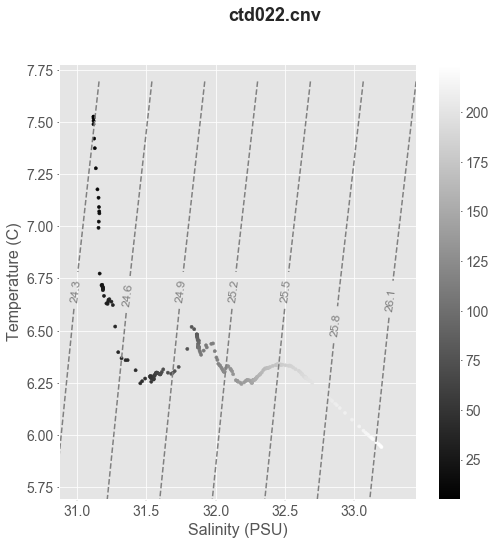

In [289]:
fig = plot_salvtemp(ctd_df.sal00,ctd_df.t090C,ctd_df.index,
                    srange=[ctd_df.sal00.min()-0.25,ctd_df.sal00.max()+.25],
                    trange=[ctd_df.t090C.min()-0.25,ctd_df.t090C.max()+.25],
                    ptitle=f.split('/')[-1])
fig.savefig(f.split('/')[-1].replace('.cnv','_TSSigma_depth.png'))